<a href="https://colab.research.google.com/github/DevunuriSrinidhi/ExcelR/blob/main/AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
responses = [
    "You can return an item within 7 days of purchase.",
    "Our return policy allows you to return items that are unopened and in their original condition."
    "To track your order, you can visit the Order Tracking page and error your order number.",
    "Our customer support team is available from 9AM to 6PM, Monday through Friday."
]

In [ ]:
#step2:
user_input = "How can I track my order?"

In [ ]:
#step3:
vectorizer = TfidfVectorizer(stop_words='english')
all_texts = responses + [user_input]

In [ ]:
#step4:
tfidf_matrix = vectorizer.fit_transform(all_texts)

In [ ]:
#step5:
user_vector = tfidf_matrix[-1]
response_vectors = tfidf_matrix[:-1]
cosine_similarities = cosine_similarity(user_vector, response_vectors)

In [ ]:
#step6:
most_similar_idx = np.argmax(cosine_similarities)


In [ ]:
#step7:
print(f"User Query: {user_input}")
print(f"Most relevant response: {responses[most_similar_idx]}")

User Query: How can I track my order?
Most relevant response: Our return policy allows you to return items that are unopened and in their original condition.To track your order, you can visit the Order Tracking page and error your order number.


1.what is a computer?

2.A computer is a programable device that stores, retrives, and processes data and gives outputs

3.what is Data Science?

4.Data science is the interdescipinary field. It helps in extracting insights or knowledge from data.

5.What is Artifical Intelligence(AI)

6.Artifical Intelligence(AI) is the ability of a computer or a robot controlled by a computer to do tasks that are usually done by human because they require human intelligence and discernment.

7.what is text similarity?

8.text similarity measures how much the meaning or content of the two pieces of text are the same.

9.list any 3 algorithm in ml?
decision tree,random forest,logistic regression

10.what does oops stands for?
opobject oriented programming.


In [ ]:
import io
import random
import string
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk

In [ ]:
nltk.download('popular', quiet=True)
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving input.txt to input.txt


In [ ]:
f=open('input.txt','r',errors='ignore')
raw=f.read()
raw=raw.lower()

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
sent_tokens = nltk.sent_tokenize(raw)
word_tokens = nltk.word_tokenize(raw)

In [ ]:
import string
lemmer=nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatze(token) for token in tokens]
remove_punct_dict=dict((ord(punct),None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
GREETING_INPUTS=("hello","hi","greetings","what's up","hey",\
                 "how are you?")
GREETING_RESPONSES=["hi","hey","hi there","hello",\
                   "I am glad! You are talking to me",\
                   "I am fine! How about you?"]
def greeting(sentence):
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [ ]:
def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec=TfidfVectorizer(tokenizer=LemNormalize,stop_words='english')
    tfidf=TfidfVec.fit_transform(sent_tokens)
    vals=cosine_similarity(tfidf[-1],tfidf)
    idx=vals.argsort()[0][-2]
    flat=vals.flatten()
    flat.sort()
    req_tfidf=flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response
    else:
        robo_response=robo_response+sent_tokens[idx]
        return robo_response


In [ ]:
flag = True
print("SABot: My name is SABot. I will answer your queries about Chatbots. If you want to exit, type Bye!")

def greeting(sentence):
    greetings = ["hello", "hi", "greetings", "sup", "what's up"]
    responses = ["Hi there!", "Hello!", "Hey!", "Hi! How can I help you?"]
    if sentence in greetings:
        return responses[greetings.index(sentence)]
    return None

def response(user_input):
    return "I am still learning. Can you rephrase that?"

while flag:
    user_response = input()
    user_response = user_response.lower()

    if user_response != 'bye':
        if user_response in ['thanks', 'thank you']:
            flag = False
            print("SABot: You are welcome.")
        else:
            greet = greeting(user_response)
            if greet is not None:
                print("SABot:", greet)
            else:
                print("SABot:", response(user_response))
    else:
        flag = False
        print("SABot: Bye! Take care.")


SABot: My name is SABot. I will answer your queries about Chatbots. If you want to exit, type Bye!
hi
SABot: Hello!
what is computer
SABot: I am still learning. Can you rephrase that?
bye
SABot: Bye! Take care.


In [ ]:
# Define responses based on input.txt
responses = {
    "what is a computer?": "A computer is a programmable device that stores, retrieves, and processes data and gives outputs.",
    "what is data science?": "Data science is an interdisciplinary field that helps in extracting insights or knowledge from data.",
    "what is artificial intelligence(ai)?": "Artificial intelligence (AI) is the ability of a computer or a robot controlled by a computer to do tasks that require human intelligence.",
    "what is text similarity?": "Text similarity measures how much the meaning or content of two pieces of text are the same.",
    "list any 3 algorithm in ml?": "Decision Tree, Random Forest, and Logistic Regression.",
    "what does oop stands for?": "OOP stands for Object-Oriented Programming."
}

# Function to handle greetings
def greeting(text):
    greetings = ["hi", "hello", "hey", "greetings"]
    if text.lower() in greetings:
        return "Hello! How can I help you?"

# Function to generate responses with partial matching
def response(user_input):
    user_input = user_input.lower()
    for key in responses.keys():
        if user_input in key:
            return responses[key]
    return "I am sorry! I don't understand you."

# Main chatbot loop
flag = True
print("GURU: My name is GURU. I will answer your queries about Chatbots. If you want to exit, type Bye!")
while flag:
    user_response = input().lower()
    if user_response != 'bye':
        if user_response in ["thanks", "thank you"]:
            flag = False
            print("GURU: You are welcome..")
        else:
            reply = greeting(user_response)
            if reply:
                print("GURU:", reply)
            else:
                print("GURU:", response(user_response))
    else:
        flag = False
        print("GURU: Bye! Take care..")

GURU: My name is GURU. I will answer your queries about Chatbots. If you want to exit, type Bye!
GURU: Hello! How can I help you?
GURU: I am sorry! I don't understand you.
GURU: A computer is a programmable device that stores, retrieves, and processes data and gives outputs.


In [1]:
sent = "Ram is studying at Malla Reddy University in Hyderabad, India"

In [3]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [9]:
import nltk
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

In [3]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.5 MB/s eta 0:00:00


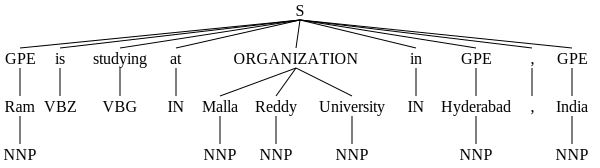

In [4]:
import nltk
from nltk import ne_chunk
from nltk import word_tokenize
ne_chunk(nltk.pos_tag(word_tokenize(sent)), binary=False)

In [5]:
!pip install spacy

In [6]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u'Apple is ready to launch new phone worth $10000 in New york time square ')
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Apple 0 5 ORG
10000 42 47 MONEY
New york 51 59 GPE


In [10]:
import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [11]:
text = """
Elon Musk the CEO of SpaceX's Starship will be launching its first crewed mission to Mars in 2027.
the mission, which will involve astronaut from NASA, will be the first of its kind,and it will take of its kind,and it take palce at the kennedy Space Center in Florida
Musk emphasized that the project would push the boundaries of space exploration"""

In [12]:
doc = nlp(text)
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")

Entity: Elon Musk, Label: PERSON
Entity: SpaceX's Starship, Label: ORG
Entity: first, Label: ORDINAL
Entity: Mars, Label: LOC
Entity: 2027, Label: DATE
Entity: NASA, Label: ORG
Entity: first, Label: ORDINAL
Entity: Space Center, Label: FAC
Entity: Florida, Label: GPE


In [13]:
from spacy import displacy
displacy.render(doc, style="ent")

In [14]:
import pandas as pd
entities = [(ent.text,ent.label_,ent.lemma_) for ent in doc.ents]
df=pd.DataFrame(entities,columns=['text','type','Lemma'])
df

,text,type,Lemma
0,Elon Musk,PERSON,Elon Musk
1,SpaceX's Starship,ORG,SpaceX's starship
2,first,ORDINAL,first
3,Mars,LOC,Mars
4,2027,DATE,2027
5,NASA,ORG,NASA
6,first,ORDINAL,first
7,Space Center,FAC,Space Center
8,Florida,GPE,Florida
